# Imports

In [12]:
import cv2 as cv
from utils import reorder,find_biggest_contour,show_images,wrapped_paper,extract_id_box,ocr
import numpy as np

In [13]:
width=480
height=480

# Read Image

In [14]:
path=input("Enter the path of the image")
image=cv.resize(cv.imread(path),(width,height))



# Preprocessing

## 1-Get the edges

In [15]:
gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
blur=cv.GaussianBlur(gray,(5,5),1)
edged = cv.Canny(blur,75, 100)

In [16]:
ocr(blur)

sar] os
oe + nee
Ie I I
» pace = free
s 580 . pase
a : fese o> Ages
oo Rast = leeo
. er¢c9 = “3e0
. 1 oaaiz = eree
Doeres = Sree
= @uln = een
eur = Galo
2 Res 0: Fee
1 omsf2 oo obake
2 OnSkS of cere
= 3asa = Taeo
TORT of ites
2th of Sure
2 PhS 2 lise
Paste re Te
1 oEiks oo Geee
eet tte oo)
Ian 5 ites
1 REIS to feee
Doi of ites
= 30th = 8053
= S50 = =100
7 ES of Sets
te



## 2-Get the contours


In [17]:
edge_copy=edged.copy()
contours, hierarchy = cv.findContours(edge_copy, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
image_color = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
cv.drawContours(image_color, contours, -1, (0, 255, 0), 10)
print("")

## 3-Get the paper

In [18]:
biggest,max_area=find_biggest_contour(contours)

In [19]:
wrapped_paper_image=wrapped_paper(width,height,biggest,blur)
wrapped_paper_original=wrapped_paper(width,height,biggest,gray)


# Get the id

## Thresold

In [20]:
adaptive_thresh = cv.adaptiveThreshold(
    wrapped_paper_image, 
    255, 
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,  # Use Gaussian weights for neighborhood
    cv.THRESH_BINARY, 
    11,  # Block size (neighborhood size)
    2   # Constant subtracted from the mean
)

# Extract Id

In [21]:
id=extract_id_box(adaptive_thresh,wrapped_paper_image)

In [22]:
ocr(id)

Ww9oMe?



# Show Image

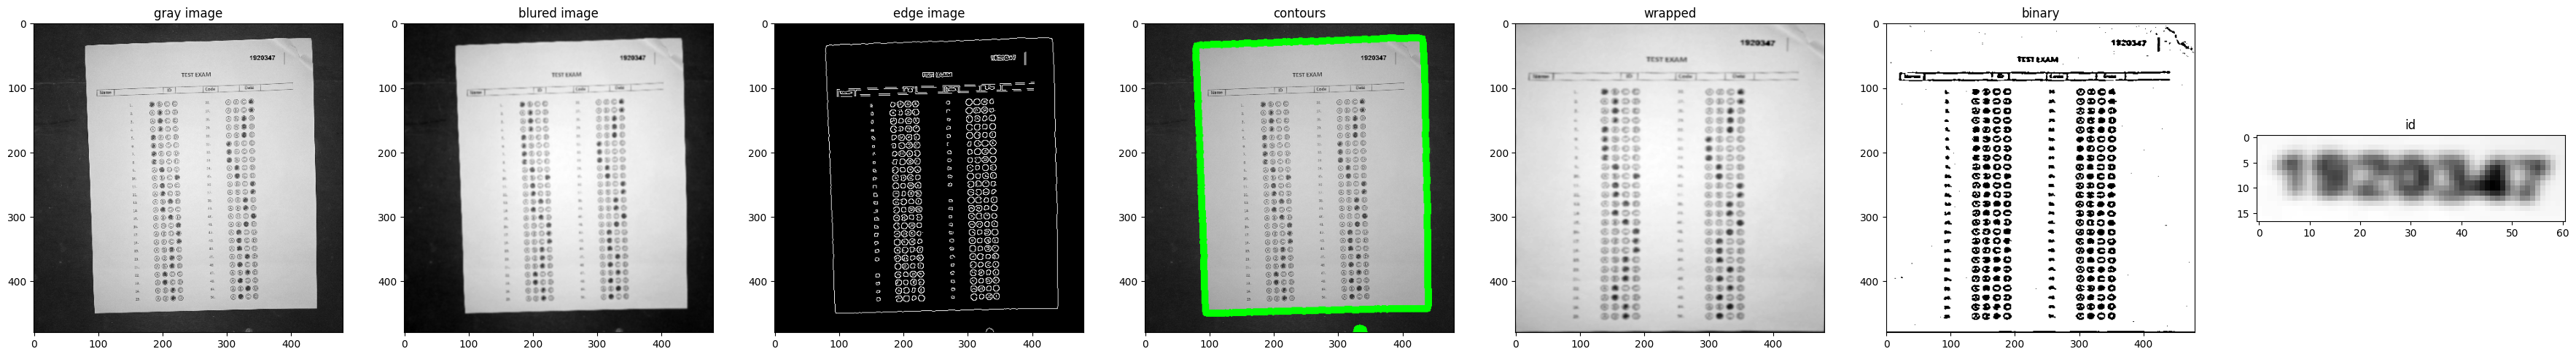

In [23]:
show_images([gray,blur,edged,image_color,wrapped_paper_image,adaptive_thresh,id],["gray image","blured image","edge image","contours","wrapped","binary","id"])